In [1]:
import numpy as np
from array import *
import csv

# using datetime module
import datetime;

# Binary Search
from bisect import bisect_left
from bisect import bisect_right

import matplotlib.pyplot as plt
import json

import multiprocessing as mp
from multiprocessing import Process, Queue
from multiprocessing import current_process
import queue
import threading


import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"
#from pyspark.sql import SparkSession
#import pyspark.pandas as ps
#from pyspark.sql.functions import col
import pandas as pd

import random
import networkx as nx
from tqdm import tqdm


#https://python-louvain.readthedocs.io/en/latest/api.html
#community.modularity(partition, graph, weight='weight')
#from community import modularity

import pickle

import powerlaw

print('----------------------')
#unique_payment_addresses_len = len(unique_payment_addresses)
unique_raw_addresses_len        = 40330345
unique_payment_addresses_len    = 40324960
unique_delegation_addresses_len = 3868049
print('unique_raw_addresses_len        = ', unique_raw_addresses_len)
print('unique_payment_addresses_len    = ', unique_payment_addresses_len)
print('unique_delegation_addresses_len = ', unique_delegation_addresses_len)

INITIAL_DATE_CARDANO      = datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S').date()
FINAL_DATE_CARDANO        = datetime.datetime.strptime('2023-01-21 17:39:30', '%Y-%m-%d %H:%M:%S').date()
total_time_length_CARDANO = int((FINAL_DATE_CARDANO - INITIAL_DATE_CARDANO).total_seconds()/86400) + 1


print('----------------------')
print('done!')



----------------------
unique_raw_addresses_len        =  40330345
unique_payment_addresses_len    =  40324960
unique_delegation_addresses_len =  3868049
----------------------
done!


In [2]:
print('----------------------')

#print(os.path.basename("/path/to/some/file.txt"))
#print(os.path.dirname("/path/to/some/file.txt"))

BASE_ADDRESS = '/local/scratch/exported/Cardano_MCH_2023_1/'
TEMP_ADDRESS = BASE_ADDRESS + '/temp_files/'


print('----------------------')
print('done!')


----------------------
----------------------
done!


In [ ]:
# ADA Velocity: Distribution of holding ADA  --->> [SAMPLE_RATE = 0.3]:


print('----------------------')
import random


def Find_ADA_Velocity(queue_):
    # read input queue arguments
    in_args = queue_.get()
    SAMPLE_RATE = in_args[0]
    FIRST_DAY   = in_args[1]
    LAST_DAY    = in_args[2]

    # ct stores current time
    ct = datetime.datetime.now()


    INITIAL_DATE_CARDANO      = datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S').date()
    FINAL_DATE_CARDANO        = datetime.datetime.strptime('2023-01-21 17:39:30', '%Y-%m-%d %H:%M:%S').date()
    total_time_length_CARDANO = int((FINAL_DATE_CARDANO - INITIAL_DATE_CARDANO).total_seconds()/86400) + 1


    hodling_day_array = [0] * total_time_length_CARDANO

    CSV_FILES_NAME_FORMAT = BASE_ADDRESS + '/cardano_TXs_Velocity_'
    NUMBER_OF_CSV_FILES = 6
    CSV_FILES_SUFFIX = '.csv'


    for i in range(1, NUMBER_OF_CSV_FILES + 1):

        ct_temp = datetime.datetime.now()

        file_name = CSV_FILES_NAME_FORMAT + str(i) + CSV_FILES_SUFFIX
        df = pd.read_csv(file_name, delimiter='|')

        et_temp = datetime.datetime.now() - ct_temp
        print("elapsed time (Load CSV File " + file_name + "): ", et_temp)

        ct_temp = datetime.datetime.now()

        for index, row in tqdm(df.iterrows()):
            ##########################################################################################
            TX_ID      = df.loc[index , 'TX_ID']
            ##########################################################################################
            BLOCK_TIME = datetime.datetime.strptime(str(df.loc[index , 'BLOCK_TIME']), '%Y-%m-%d %H:%M:%S').date()
            tx_delta_day = int((BLOCK_TIME - INITIAL_DATE_CARDANO).total_seconds()/86400)
            if(tx_delta_day<FIRST_DAY  or  tx_delta_day>LAST_DAY):
                continue;
            ##########################################################################################
            EPOCH_NO   = str( df.loc[index , 'EPOCH_NO'] )
            ##########################################################################################
            inputs_list = list( df.loc[index , 'INPUTs'].split(';') )
            for tx_input in inputs_list:
                #address_raw           = tx_input.split(',')[4]
                #address_has_script    = tx_input.split(',')[7]
                #payment_cred          = tx_input.split(',')[8]
                #stake_address         = tx_input.split(',')[9]
                input_value           = int(tx_input.split(',')[6])
                input_time_str        = tx_input.split(',')[10]
                INPUT_TIME            = datetime.datetime.strptime(input_time_str, '%Y-%m-%d %H:%M:%S').date()
                INPUT_HOLDING_DAY     = int((BLOCK_TIME - INPUT_TIME).total_seconds()/86400)

                # Generate a random float between 0 and 1
                random_float = random.random()
                if(random_float <= SAMPLE_RATE):
                    hodling_day_array[INPUT_HOLDING_DAY] = hodling_day_array[INPUT_HOLDING_DAY] + input_value
            ##########################################################################################
            #outputs_list = list( df.loc[index , 'OUTPUTs'].split(';') )
            #for tx_output in outputs_list:
            #    address_raw        = tx_output.split(',')[1]
            #    address_has_script = tx_output.split(',')[4]
            #    payment_cred       = tx_output.split(',')[5]
            #    stake_address      = tx_output.split(',')[6]
            #    [address_payment_part, address_delegation_part] = extract_payment_delegation_parts(address_raw, payment_cred, stake_address)
            #    if (address_payment_part != '' and address_delegation_part != ''):
            #        indx1 = BinarySearch(unique_delegation_addresses, address_delegation_part)
            #        indx2 = BinarySearch(unique_payment_addresses, address_payment_part)
            #        stake_delegation_array[indx1].append(indx2)
            ##########################################################################################

            ##########################################################################################

        et_temp = datetime.datetime.now() - ct_temp
        print("elapsed time (ADA Velocity from CSV File " + file_name + "): ", et_temp)

    output_filename = BASE_ADDRESS + '/YuZhang_Holding_Days/YuZhang__HoldingDayArray__' + 'SampleRate_' + str(SAMPLE_RATE).zfill(4) + '_From_' + str(FIRST_DAY).zfill(4) + '_To_' + str(LAST_DAY).zfill(4) + '__Cardano_TXs_All.txt'
    print('output_filename = ', output_filename)
    pickle.dump(hodling_day_array, open(output_filename, 'wb'))

    ##########################################################################################
    print('----------------------')
    et = datetime.datetime.now() - ct
    print("Total elapsed time (ADA Velocity): ", et)




##########################################################################################
print('----------------------')
print('done!')



----------------------
----------------------
done!


In [ ]:
# Run Parallel Processes:


print('----------------------')

SAMPLE_RATE = 1
#SAMPLE_RATE = 0.3

#FIRST_DAY_of_each_month_2022   = [1561,1592,1620,1651,1681,1712,1742,1773,1804,1834,1865,1895,1926]
FIRST_DAY_of_each_month_2022    = [8,   189, 395, 546, 760, 912, 1126,1277,1491,1642,1856,1895,1926]

# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)


##########################################################################################
if __name__ == "__main__":  # confirms that the code is under main function
    q1  = Queue()
    q2  = Queue()
    q3  = Queue()
    q4  = Queue()
    q5  = Queue()
    q6  = Queue()
    q7  = Queue()
    q8  = Queue()
    q9  = Queue()
    q10 = Queue()
    q11 = Queue()
    q12 = Queue()



    q1.put ([SAMPLE_RATE, FIRST_DAY_of_each_month_2022[0],  FIRST_DAY_of_each_month_2022[1]])
    q2.put ([SAMPLE_RATE, FIRST_DAY_of_each_month_2022[1],  FIRST_DAY_of_each_month_2022[2]])
    q3.put ([SAMPLE_RATE, FIRST_DAY_of_each_month_2022[2],  FIRST_DAY_of_each_month_2022[3]])
    q4.put ([SAMPLE_RATE, FIRST_DAY_of_each_month_2022[3],  FIRST_DAY_of_each_month_2022[4]])
    q5.put ([SAMPLE_RATE, FIRST_DAY_of_each_month_2022[4],  FIRST_DAY_of_each_month_2022[5]])
    q6.put ([SAMPLE_RATE, FIRST_DAY_of_each_month_2022[5],  FIRST_DAY_of_each_month_2022[6]])
    q7.put ([SAMPLE_RATE, FIRST_DAY_of_each_month_2022[6],  FIRST_DAY_of_each_month_2022[7]])
    q8.put ([SAMPLE_RATE, FIRST_DAY_of_each_month_2022[7],  FIRST_DAY_of_each_month_2022[8]])
    q9.put ([SAMPLE_RATE, FIRST_DAY_of_each_month_2022[8],  FIRST_DAY_of_each_month_2022[9]])
    q10.put([SAMPLE_RATE, FIRST_DAY_of_each_month_2022[9],  FIRST_DAY_of_each_month_2022[10]])
    q11.put([SAMPLE_RATE, FIRST_DAY_of_each_month_2022[10], FIRST_DAY_of_each_month_2022[11]])
    q12.put([SAMPLE_RATE, FIRST_DAY_of_each_month_2022[11], FIRST_DAY_of_each_month_2022[12]])



    # Create Processes:
    p1  = mp.Process(target=Find_ADA_Velocity, args=(q1,))
    p2  = mp.Process(target=Find_ADA_Velocity, args=(q2,))
    p3  = mp.Process(target=Find_ADA_Velocity, args=(q3,))
    p4  = mp.Process(target=Find_ADA_Velocity, args=(q4,))
    p5  = mp.Process(target=Find_ADA_Velocity, args=(q5,))
    p6  = mp.Process(target=Find_ADA_Velocity, args=(q6,))
    p7  = mp.Process(target=Find_ADA_Velocity, args=(q7,))
    p8  = mp.Process(target=Find_ADA_Velocity, args=(q8,))
    p9  = mp.Process(target=Find_ADA_Velocity, args=(q9,))
    p10 = mp.Process(target=Find_ADA_Velocity, args=(q10,))
    p11 = mp.Process(target=Find_ADA_Velocity, args=(q11,))
    p12 = mp.Process(target=Find_ADA_Velocity, args=(q12,))

    # Start Processes:
    p1.start()
    p2.start()
    p3.start()
    p4.start()

    # Start Processes:
    p5.start()
    p6.start()
    p7.start()
    p8.start()

    # Start Processes:
    p9.start()
    p10.start()
    p11.start()
    p12.start()

    
    
    # Wait for Processes to finish:
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    # Wait for Processes to finish:
    p5.join()
    p6.join()
    p7.join()
    p8.join()
    # Wait for Processes to finish:
    p9.join()
    p10.join()
    p11.join()
    p12.join()


##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time (Fill \"holding_day_arrays\" for all CSV Files): ", et)


##########################################################################################
print('----------------------')
print('done!')



----------------------
current time:  2023-12-03 17:23:05.749027
elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:01:39.167831


0it [00:00, ?it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:01:39.509610


0it [00:00, ?it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:01:41.436153


3086it [00:02, 1742.84it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:01:42.223110


7516it [00:04, 4238.75it/s]s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:01:44.509344


0it [00:00, ?it/s]752.90it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:01:44.536150


35409it [00:05, 12844.76it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:01:44.751247


16757it [00:05, 11895.46it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:01:45.100821


19929it [00:05, 13687.63it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:01:45.177412


21581it [00:05, 14465.90it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:01:45.429964


82119it [00:08, 15555.50it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:01:47.816970


25084it [00:06, 14946.65it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:01:47.983879


10000000it [10:35, 15736.93it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  

8296995it [10:39, 15807.78it/s]

0:10:35.469234


10000000it [10:39, 15646.52it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:10:39.126170


10000000it [10:46, 15471.65it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:10:46.348372


10000000it [10:57, 15197.73it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:10:58.022307


10000000it [10:53, 15305.19it/s]
9865535it [10:53, 15513.15it/s]

elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:10:53.380912


10000000it [10:52, 15322.78it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:10:52.630061


10000000it [11:01, 15108.12it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:11:01.916794


10000000it [11:02, 15100.50it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:11:02.237390


10000000it [11:07, 14989.23it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:11:07.163818


10000000it [11:25, 14595.78it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:11:25.135904


10000000it [12:28, 13353.23it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:12:28.888393


9807358it [13:30, 9148.87it/s] 

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:02:38.101096


31706it [00:12, 15144.85it/s]]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:02:40.724728


109315it [00:17, 15614.93it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:02:54.852413


9995787it [13:49, 9773.69it/s] 

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  

148616it [00:19, 15888.60it/s]

0:03:00.956015


10000000it [13:50, 12044.47it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_1.csv):  0:13:50.265228


54287it [00:09, 15044.86it/s]]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:02:47.784965


55795it [00:09, 14855.33it/s]]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:03:16.482159


221878it [00:24, 15882.36it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:03:15.774013


159930it [00:16, 14287.50it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:03:03.158989


169343it [00:18, 15371.23it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:03:14.978090


470194it [00:36, 16123.05it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:02:54.867513


915985it [01:05, 15931.40it/s]]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv): 

840943it [01:09, 15610.04it/s]

 0:02:32.326538

823106it [01:02, 15839.39it/s]

466893it [00:37, 15855.40it/s]]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:01:44.347416


10000000it [10:41, 15600.57it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:10:41.019541


10000000it [10:39, 15626.34it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:10:39.947448


10000000it [10:39, 15648.44it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:10:39.044424


9695552it [10:24, 15458.37it/s]]
8324467it [10:52, 8610.27it/s]

elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  

9991999it [10:40, 14690.24it/s]

0:10:43.088759


10000000it [10:40, 15603.69it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:10:40.876550


10000000it [10:49, 15397.22it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:10:49.470613


10000000it [10:43, 15530.10it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:10:43.913568


10000000it [10:35, 15738.78it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:10:35.378669


10000000it [11:08, 14966.35it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  

9483867it [10:09, 15611.32it/s]

0:11:08.167772


10000000it [10:42, 15561.55it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:10:42.613030


9639378it [13:20, 9757.32it/s]]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:02:51.802318


9673452it [13:24, 10411.07it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:02:29.733075


42243it [00:09, 12058.28it/s]s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:02:41.304526


144264it [00:15, 14264.33it/s] 

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:02:24.244490


39643it [00:08, 14674.86it/s]s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:02:13.229003

168098it [00:17, 15627.06it/s]

10000000it [13:57, 11935.31it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:13:57.852452


2316021it [02:32, 16345.39it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:05:05.915797


2388215it [02:39, 16199.51it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:05:23.402950


2393112it [02:39, 16209.61it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:05:23.217265


2766897it [03:03, 15956.15it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:05:28.741182


3197891it [03:30, 15862.79it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:02:57.403046


10000000it [15:04, 11057.16it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_2.csv):  0:15:04.393363


451772it [00:39, 15941.13it/s]]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:05:22.542466


5128544it [05:33, 15968.12it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:02:01.098132


10000000it [10:36, 15709.43it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:10:36.563308


10000000it [10:43, 15530.79it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:10:43.884896


3726317it [07:13, 9475.12it/s]s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  

6269702it [06:48, 15942.46it/s]

0:10:39.155203


10000000it [10:44, 15511.20it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:10:44.697771


10000000it [11:04, 15047.85it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:11:04.549037


7987118it [08:37, 15931.58it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  0:01:59.921117


25744it [00:09, 14254.29it/s]s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  0:01:58.753668


4822020it [09:18, 8820.87it/s]]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  0:02:04.650509


8632474it [09:17, 14093.40it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv): 

9982129it [10:44, 14912.41it/s]

 0:01:55.584984


10000000it [10:45, 15485.83it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  

9308978it [09:58, 15832.71it/s]

0:10:45.755484


10000000it [10:50, 15383.49it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:10:50.057710


10000000it [10:59, 15173.01it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:10:59.068297


10000000it [10:42, 15566.76it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:10:42.397617


9369495it [10:04, 16183.53it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  0:03:03.367831


10000000it [10:43, 15535.89it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:10:43.675030


10000000it [10:41, 15583.99it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  

6593018it [12:44, 8961.14it/s]

0:10:41.686543


3805185it [04:08, 15864.48it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  0:03:42.657487


4734459it [05:11, 16224.45it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  0:02:56.995332


5144133it [05:37, 15890.29it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv): 

5706650it [06:24, 15756.53it/s]

 0:04:58.693004


6596375it [07:05, 15679.37it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  0:06:13.168394


6914695it [07:27, 15787.96it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  0:06:08.953124


910287it [01:03, 15678.23it/s]]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  

5728647it [06:15, 16310.86it/s]

0:06:16.869983


10000000it [19:16, 8650.06it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_3.csv):  0:19:16.064554


9887306it [10:36, 15524.32it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  0:10:36.894041

8490590it [09:09, 15512.32it/s]

9887306it [10:32, 15625.61it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  0:10:32.764962


9887306it [10:34, 15581.42it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  0:10:34.560616


9887306it [11:00, 14977.50it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  0:11:00.146222


4042242it [04:43, 15276.87it/s]


elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  0:10:38.196027


5539386it [05:57, 15860.99it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  0:02:22.749469


5246901it [06:00, 16048.04it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_5.csv): 

5178612it [05:54, 15010.68it/s]

 0:02:39.680991


6253546it [06:42, 15858.27it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_5.csv):  0:02:31.282498


109837it [00:12, 13592.09it/s]]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_5.csv):  0:02:57.816527


667838it [01:26, 8043.82it/s]s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_5.csv):  0:02:22.514342


9887306it [10:41, 15406.95it/s]
868204it [01:02, 14757.79it/s]

elapsed time (ADA Velocity from CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_4.csv):  0:10:41.751031


7719012it [08:26, 15804.98it/s]

elapsed time (Load CSV File /local/scratch/exported/Cardano_MCH_2023_1//cardano_TXs_Velocity_5.csv):  0:03:26.161661


6880425it [09:04, 9025.60it/s]]

12it [00:00, 208.08it/s]


-1.4180696487668696,
-1.8625391509140026,
-1.9315196847705107,
-2.091605928533007,
-1.989659827621932,
-2.153345307846216,
-2.1889719547305795,
-2.0581441990158864,
-1.802804650556879,
-1.8748015949010757,
-1.7091205015189,
-1.6631744787048324,


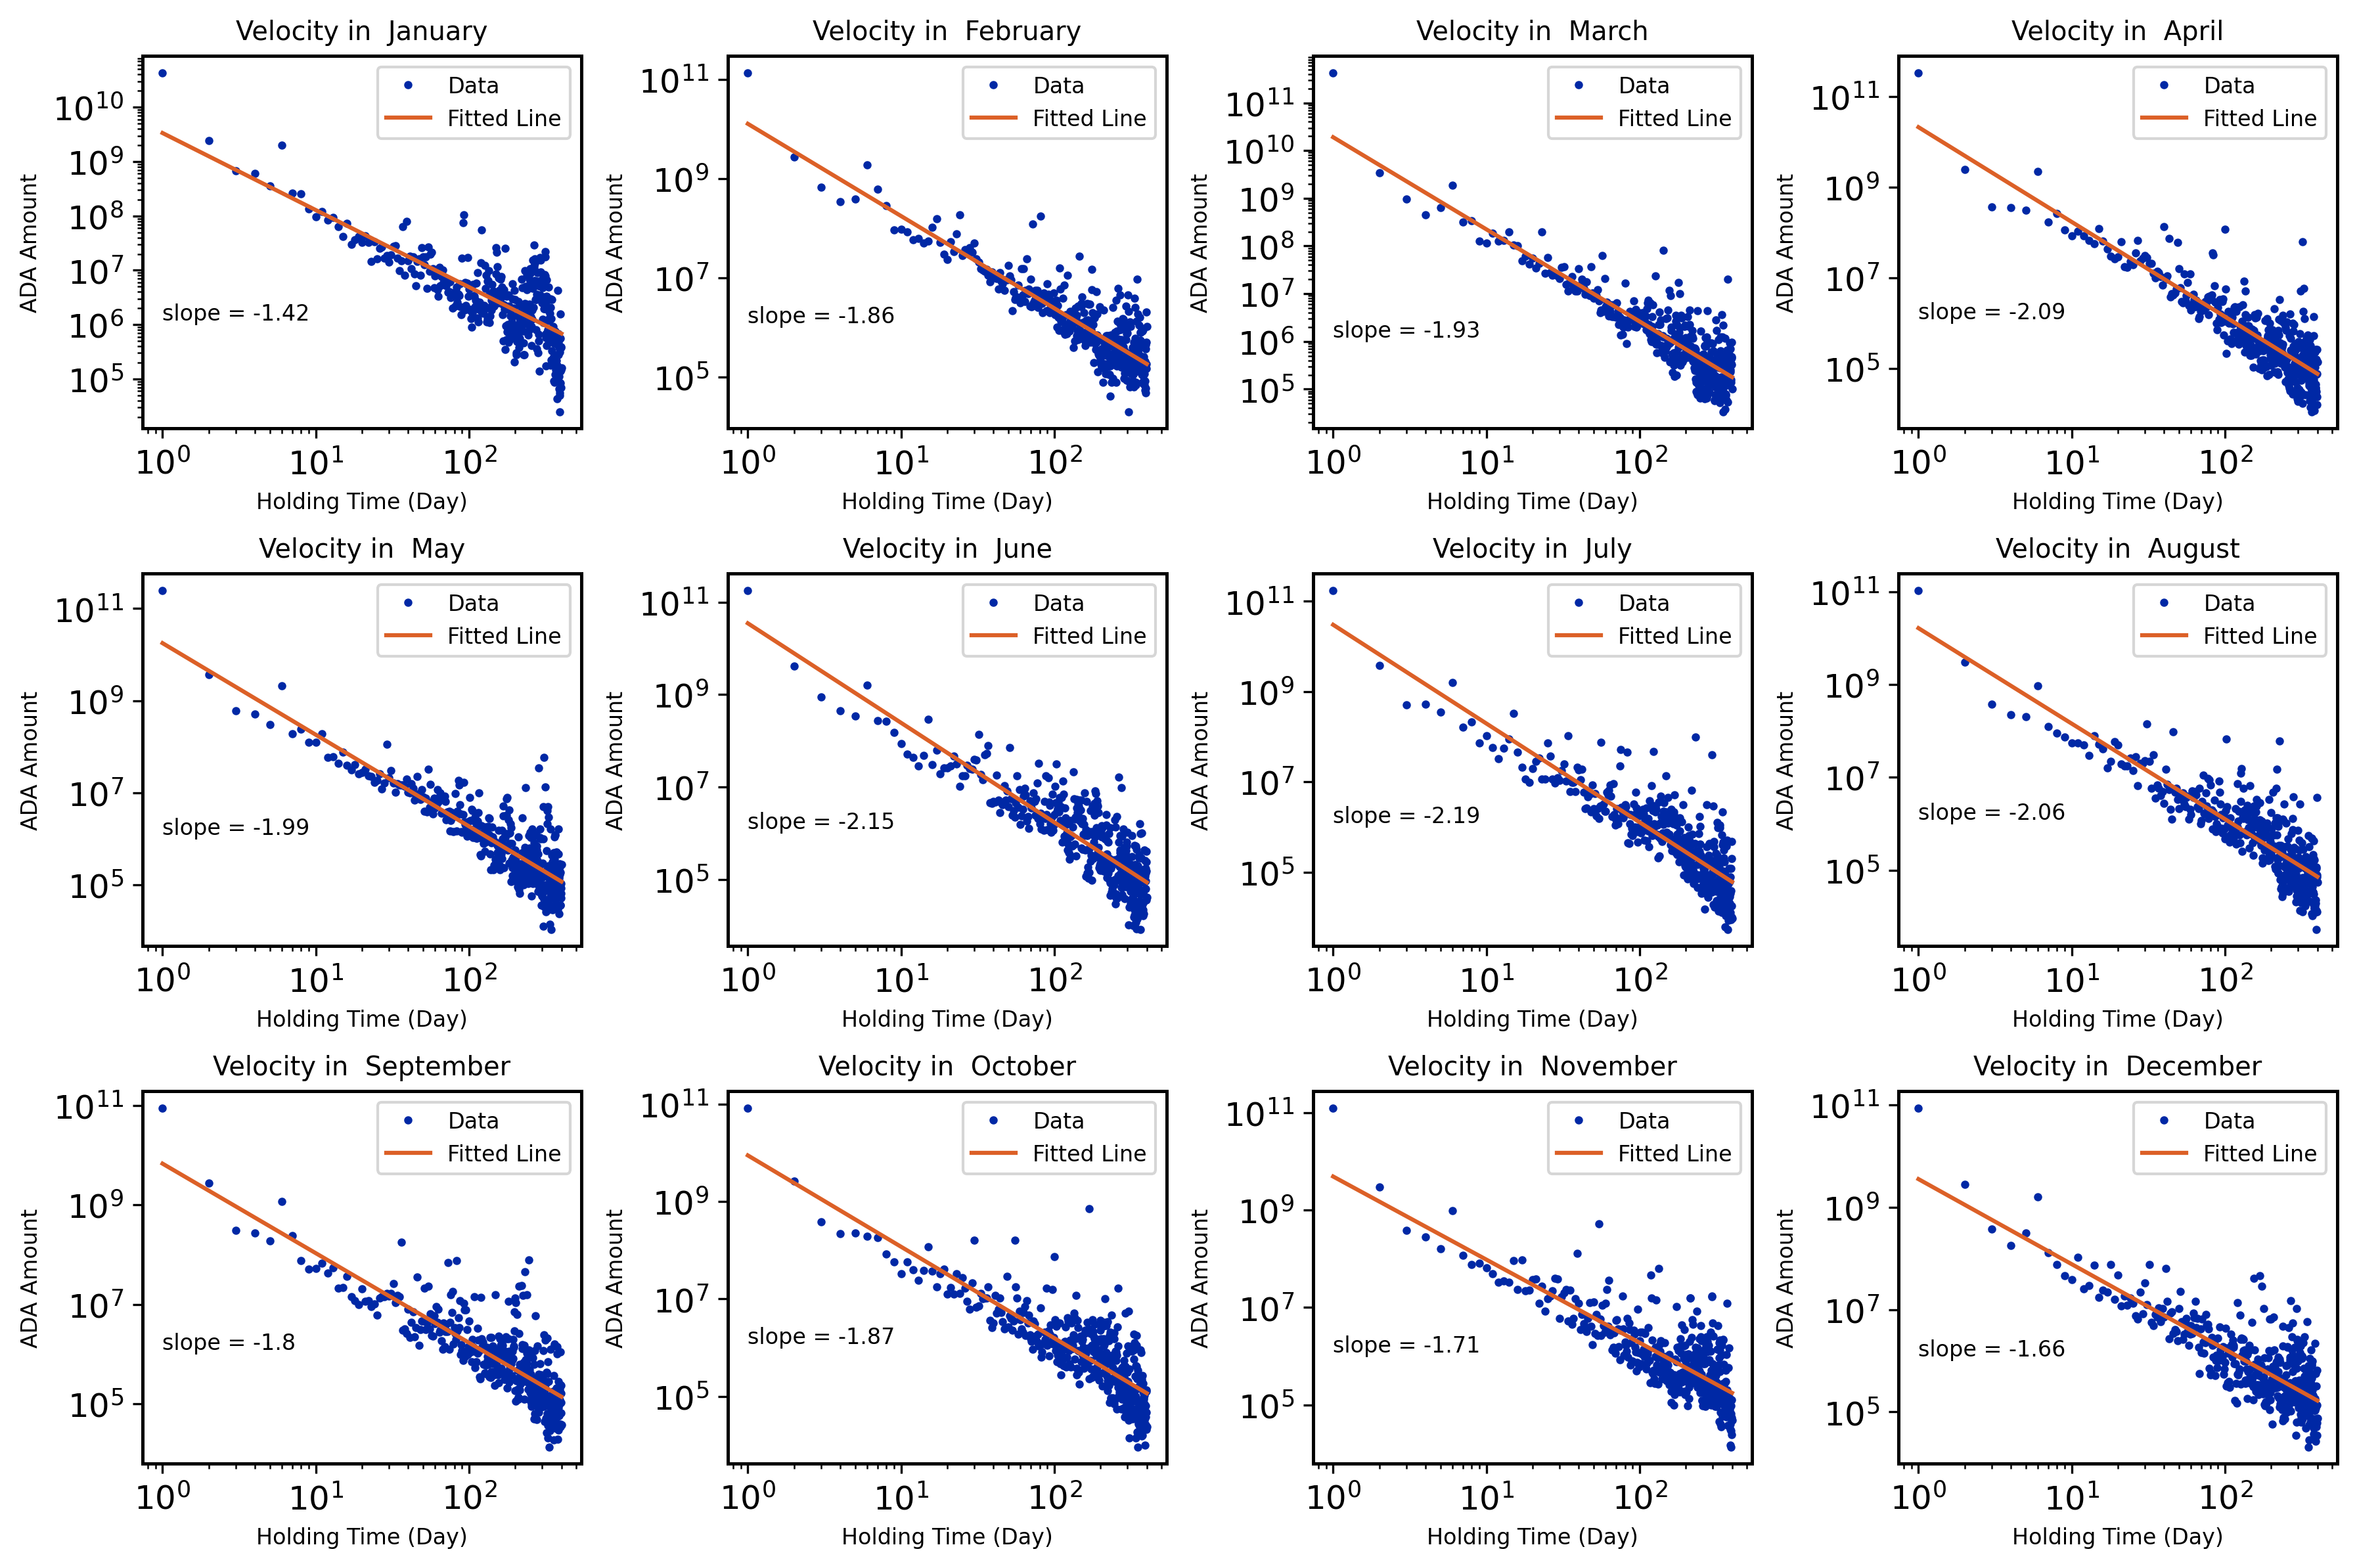

In [ ]:
# PLOT: ADA hodling time distribution

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')
import calendar


def linear_function(x, a, b):
    return a * x + b


# Create a figure with 12 subplots arranged in a 3x4 grid
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

# Set the font size
plt.rcParams['font.size'] = 8


#FIRST_DAY_of_each_month_2022    = [1561,1592,1620,1651,1681,1712,1742,1773,1804,1834,1865,1895,1926] # One month (2022)
#FIRST_DAY_of_each_month_2022    = [   8, 189, 395, 546, 760, 912,1126,1277,1491,1642,1856,1895,1926] # Six months (from 2017 to 2022)
FIRST_DAY_of_each_month_2022     = [           395, 546, 760, 912,1126,1277,1491,1642,1856,1895     ] # Six months (from 2017 to 2022)


# Create your individual plots and customize them
for i, ax in tqdm(enumerate(axes.flatten())):
    file_name = BASE_ADDRESS + '/YuZhang_Holding_Days/' + 'YuZhang__HoldingDayArray__SampleRate_0001_From_' + str(FIRST_DAY_of_each_month_2022[i]).zfill(4) + '_To_' + str(FIRST_DAY_of_each_month_2022[i+1]).zfill(4) + '__Cardano_TXs_All.txt'
    #file_name = BASE_ADDRESS + '/YuZhang_Holding_Days/' + 'YuZhang__HoldingDayArray__SampleRate_00.3_From_' + str(FIRST_DAY_of_each_month_2022[i]).zfill(4) + '_To_' + str(FIRST_DAY_of_each_month_2022[i+1]).zfill(4) + '__Cardano_TXs_All.txt'

    hodling_day_array = pickle.load(open(file_name, 'rb'))
    hodling_day_array_ADA = [0] * len(hodling_day_array)
    for j in range(len(hodling_day_array_ADA)):
            hodling_day_array_ADA[j] = float(hodling_day_array[j]) / 1000000
    #pick up only the first 400 values:
    hodling_day_array_ADA = hodling_day_array_ADA[:400]
    # Example data
    x = np.arange(1,len(hodling_day_array_ADA)+1)
    y = np.array(hodling_day_array_ADA)
    # Fit the line to the data
    params, _ = curve_fit(linear_function, np.log10(x), np.log10(y))

    slope = params[0]
    intercept = params[1]
    #print("Slope(" + str(calendar.month_name[i+1]) + "):", slope)
    #print("Intercept(" + str(calendar.month_name[i+1]) + "):", intercept)
    print(str(slope) + ',')
    
    # Generate points for the line
    x_line = np.linspace(min(x), max(x), 100)
    y_line = 10**(linear_function(np.log10(x_line), *params))
    # Plot the original data and the fitted line
    ax.plot(x, y, 'o', markersize=2, label='Data')
    ax.plot(x_line, y_line, label='Fitted Line')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Holding Time (Day)', fontsize=8)
    ax.set_ylabel('ADA Amount', fontsize=8)
    ax.legend(fontsize=8)
    ax.text(10**(0), 10**(6), 'slope = ' + str(round(slope, 2)), fontsize=8, verticalalignment='bottom', horizontalalignment='left')
    #ax.plot([1, 2, 3], [4, 5, 6])
    ax.set_title(f'Velocity in  {calendar.month_name[i+1]}')


# Adjust the layout and spacing between subplots
plt.tight_layout()

#plt.savefig('fig_velocity_monthly_30percent__2022.pdf', bbox_inches='tight', facecolor='white')

# Show the figure
plt.show()



In [ ]:
# Find ground truth for velocity:


# Subsequently, this value will be compared to the velocity calculated based on random sampling of transactions.



FIRST_DAY_of_each_month_2022   = [1561,1592,1620,1651,1681,1712,1742,1773,1804,1834,1865,1895,1926]
#FIRST_DAY_of_each_month_2022  = [8,   189, 395, 546, 760, 912, 1126,1277,1491,1642,1856,1895,1926] # Six months (from 2017 to 2022)
#FIRST_DAY_of_each_month_2022  = [          395, 546, 760, 912, 1126,1277,1491,1642,1856,1895     ] # Six months (from 2017 to 2022)



# Create your individual plots and customize them
for i, ax in tqdm(enumerate(axes.flatten())):
    file_name = BASE_ADDRESS + '/YuZhang_Holding_Days/' + 'YuZhang__HoldingDayArray__SampleRate_0001_From_' + str(FIRST_DAY_of_each_month_2022[i]).zfill(4) + '_To_' + str(FIRST_DAY_of_each_month_2022[i+1]).zfill(4) + '__Cardano_TXs_All.txt'
    #file_name = BASE_ADDRESS + '/YuZhang_Holding_Days/' + 'YuZhang__HoldingDayArray__SampleRate_00.3_From_' + str(FIRST_DAY_of_each_month_2022[i]).zfill(4) + '_To_' + str(FIRST_DAY_of_each_month_2022[i+1]).zfill(4) + '__Cardano_TXs_All.txt'

    hodling_day_array = pickle.load(open(file_name, 'rb'))
    hodling_day_array_ADA = [0] * len(hodling_day_array)
    for j in range(len(hodling_day_array_ADA)):
            hodling_day_array_ADA[j] = float(hodling_day_array[j]) / 1000000

    #pick up only the first 400 values:
    hodling_day_array_ADA = hodling_day_array_ADA[:400]
    
    month_length = FIRST_DAY_of_each_month_2022[i+1] - FIRST_DAY_of_each_month_2022[i] + 1
    ground_truth_velocity = sum(hodling_day_array_ADA) / month_length

    x = np.arange(1,len(hodling_day_array_ADA)+1)
    y = np.array(hodling_day_array_ADA)

    #print('ground_truth_velocity[' + str(calendar.month_name[i+1]) + ']= ' + str(ground_truth_velocity))
    print(str(ground_truth_velocity) + ',')



12it [00:00, 819.77it/s]

5622337665.771803,
16563101828.384222,
45603593753.89455,
37285508891.113884,
26986356864.0499,
20347431915.463184,
19195916275.748615,
11912444865.24096,
10416795319.70121,
9384538589.312378,
14222224378.127527,
9765548495.501799,


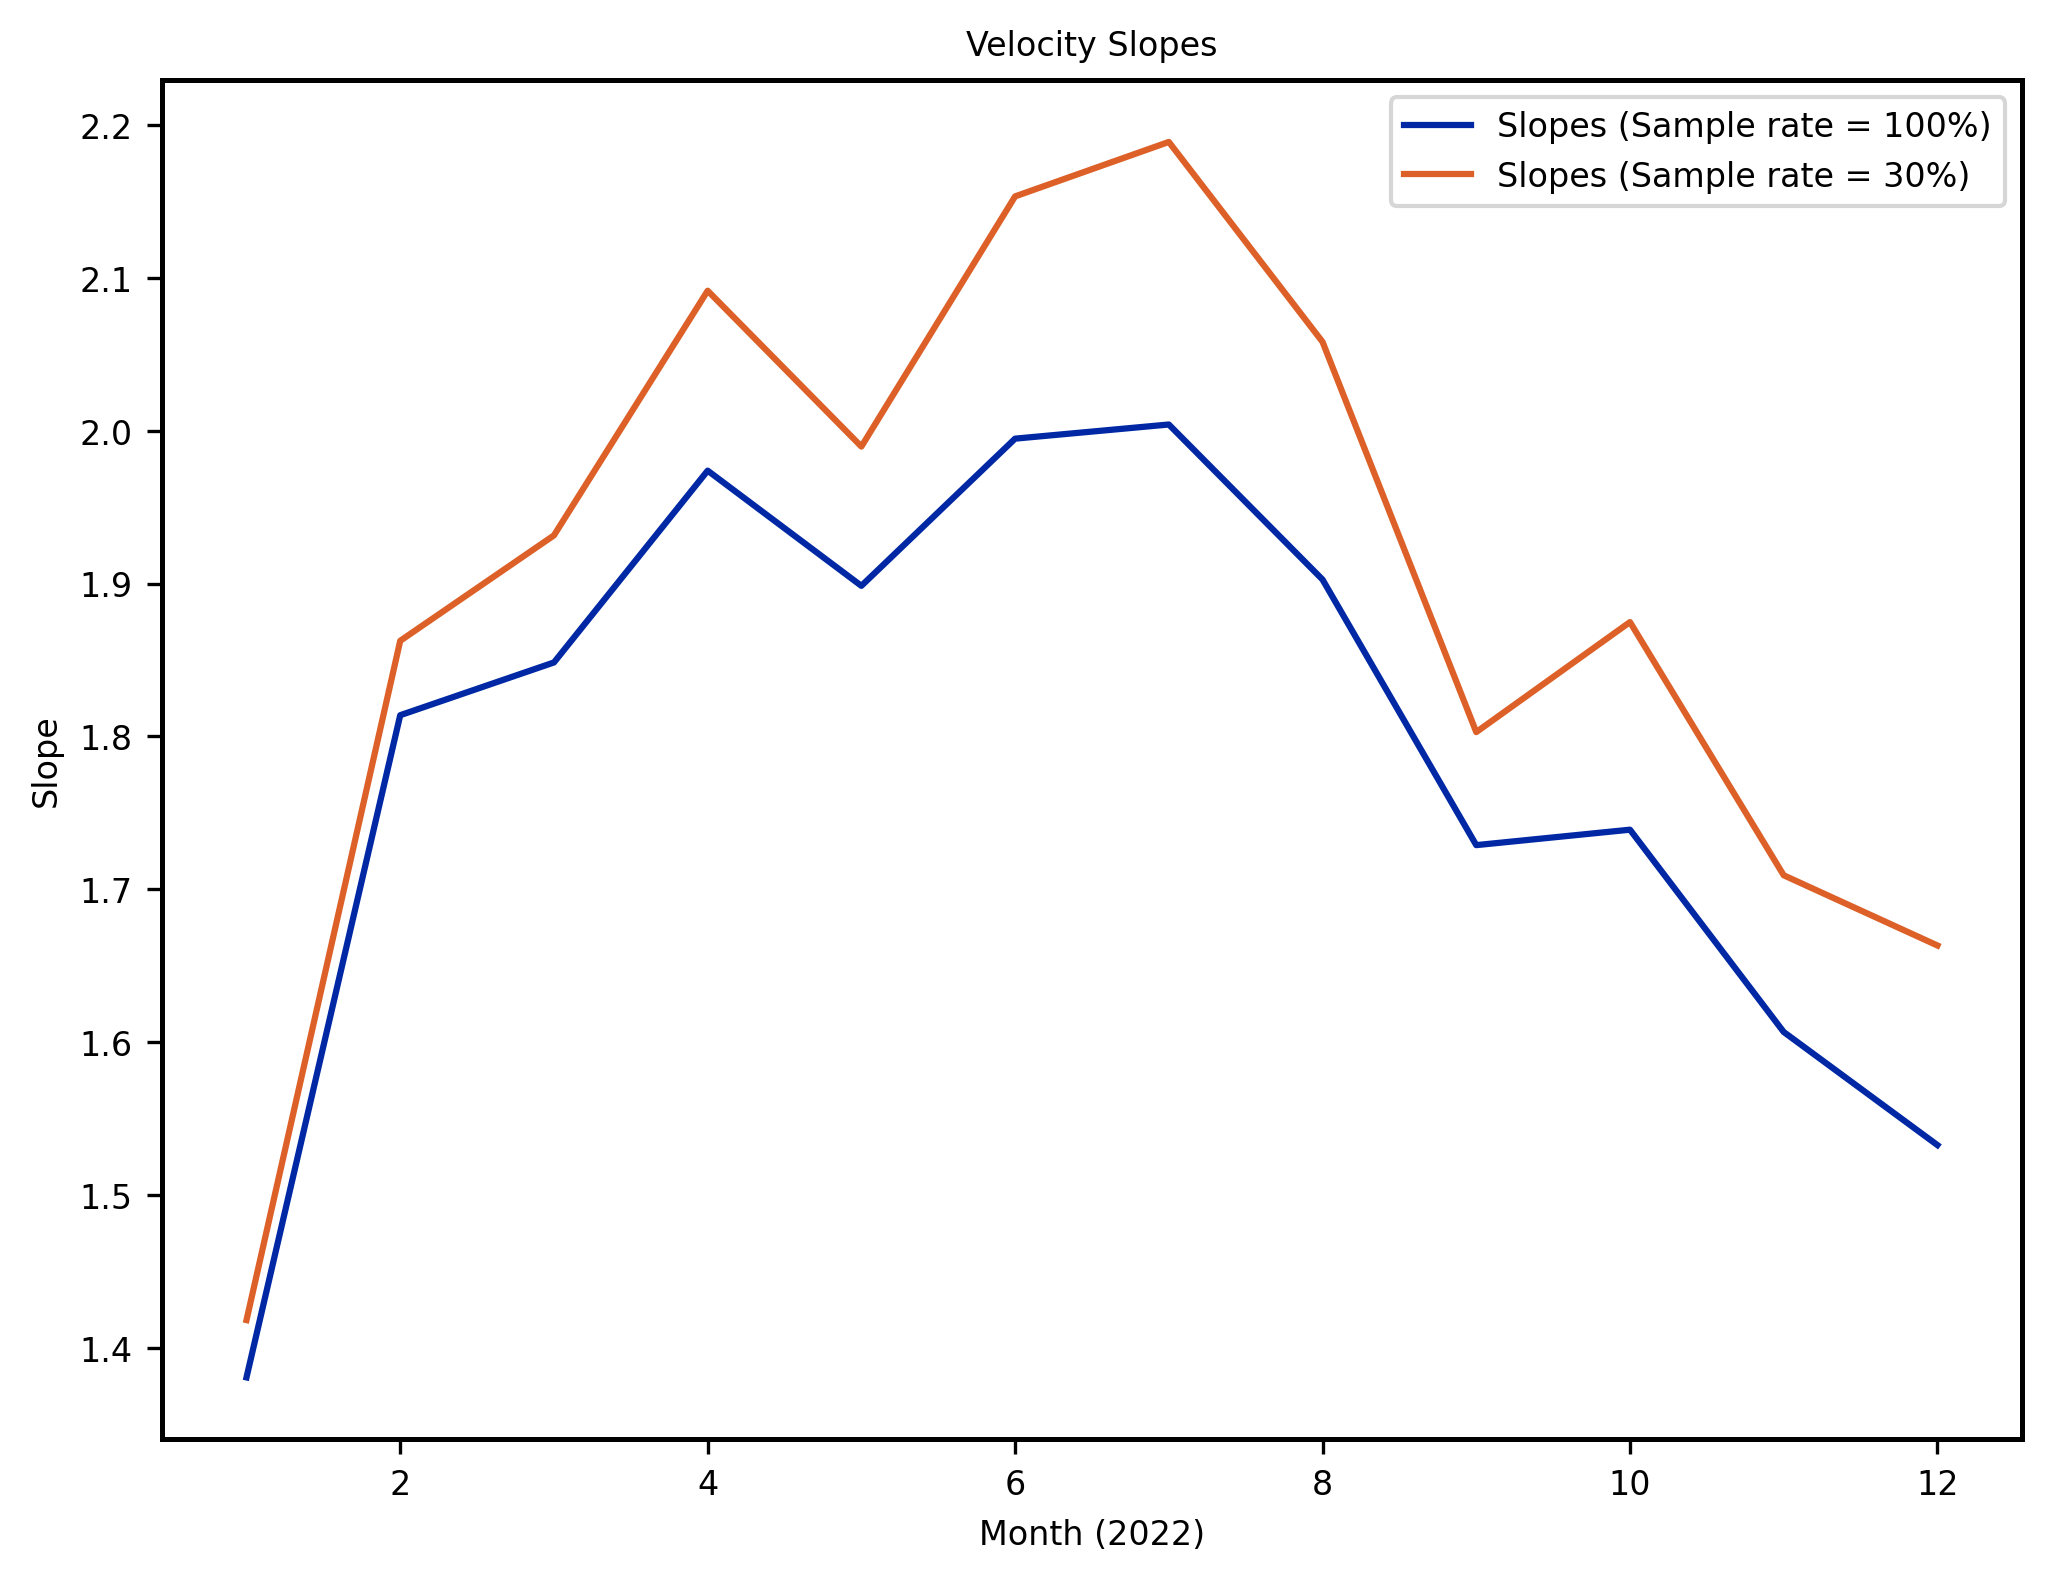

In [ ]:
# PLOT: compare ADA velocity time calculated with random sampling rates 100% and 30%:

import numpy as np
import matplotlib.pyplot as plt

# Set the font size
plt.rcParams['font.size'] = 8


# 1 month:
slopes_100_percent = [-1.3805555015996065,
-1.8138568717107955,
-1.8483702686640888,
-1.9738868472642057,
-1.898502908286038,
-1.9948230602124728,
-2.0040775140594587,
-1.902617943699492,
-1.7288432007126504,
-1.7389444086842065,
-1.6065794798906534,
-1.5325754751749825]


# 1 month:
slopes_30_percent = [-1.4180696487668696,
-1.8625391509140026,
-1.9315196847705107,
-2.091605928533007,
-1.989659827621932,
-2.153345307846216,
-2.1889719547305795,
-2.0581441990158864,
-1.802804650556879,
-1.8748015949010757,
-1.7091205015189,
-1.663174478704832]
    
#-1.4278730051119375,
#-1.9269453689288238,
#-1.90868090537373,
#-2.05668419000315,
#-2.038637592642142,
#-2.14343817399364,
#-2.179304285472793,
#-2.02702971637544,
#-1.810241804306238,
#-1.8939682391359218,
#-1.6825970832897164,
#-1.633828006406128]


# 6 months:
#slopes_100_percent = [-1.2818416003131272,
#-1.5044780389816446,
#-1.5579041997441874,
#-1.6020886257030376,
#-2.2073810923562878,
#-1.8199877124053103,
#-1.5939001913449156,
#-1.763742208785536,
#-1.6097758378225189]


# 6 months:
#slopes_30_percent = [-1.3111418310103478,
#-1.5501026736845522,
#-1.6083965622386138,
#-1.6146364573407728,
#-2.2507874319352,
#-1.866231272570478,
#-1.6299161813239214,
#-1.8334737438545359,
#-1.6984712498757741]

#slopes_30_percent = np.prod(slopes_30_percent)
#slopes_100_percent = np.prod(slopes_100_percent)


# Generate sample data
x = np.arange(1, 13)
#x = np.arange(1, 10)


# Create a new figure
plt.figure(figsize=(8, 6))

# Plot the first array
plt.plot(x, -np.array(slopes_100_percent), label='Slopes (Sample rate = 100%)')

# Plot the second array
plt.plot(x, -np.array(slopes_30_percent), label='Slopes (Sample rate = 30%)')

# Add labels and title
plt.xlabel('Month (2022)', fontsize=8)
plt.ylabel('Slope', fontsize=8)
plt.title('Velocity Slopes', fontsize=8)

# Add a legend
plt.legend(fontsize=8)


plt.savefig('fig_velocity_slopes_compare__2022.pdf', bbox_inches='tight', facecolor='white')


# Show the plot
plt.show()



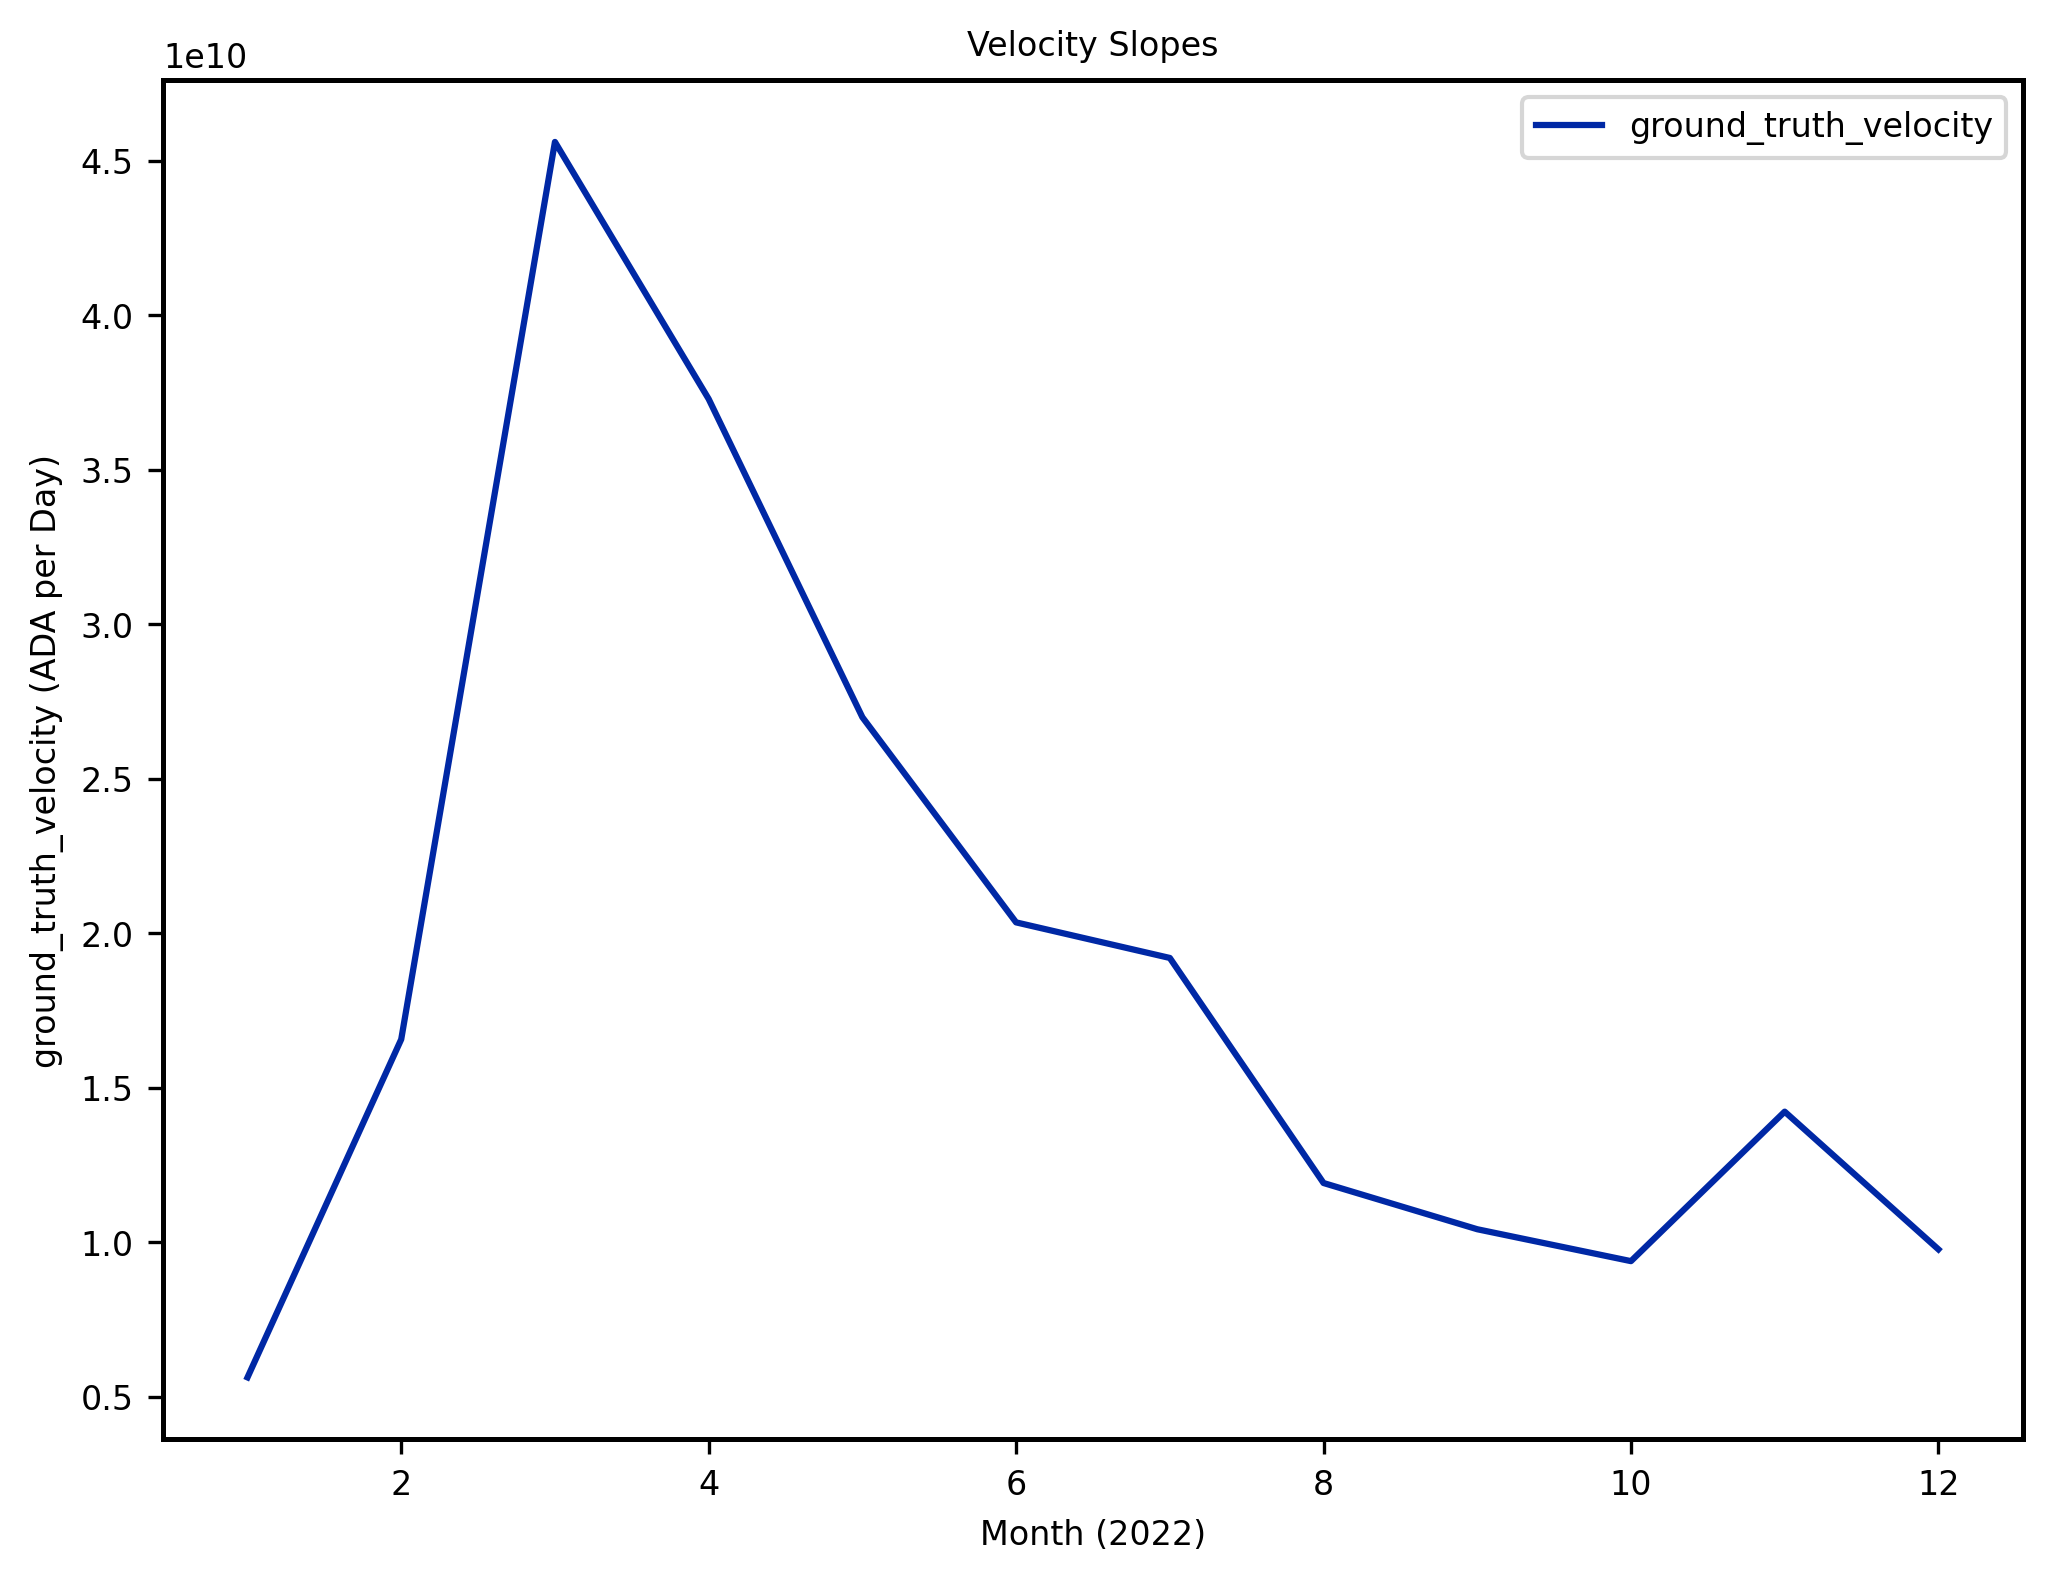

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Set the font size
plt.rcParams['font.size'] = 8



ground_truth_velocity = [5622337665.771803,
16563101828.384222,
45603593753.89455,
37285508891.113884,
26986356864.0499,
20347431915.463184,
19195916275.748615,
11912444865.24096,
10416795319.70121,
9384538589.312378,
14222224378.127527,
9765548495.501799]


#ground_truth_velocity = [5630325497.159878,
#    16570497422.347834,
#    45608616318.316986,
#    37289967589.14388,
#    27075499644.34625,
#    20355459200.56458,
#    19200873819.300247,
#    11915727516.40628,
#    10424323813.734743,
#    9394153898.724947,
#    14232143041.952446,
#    9783502514.076357]


#ground_truth_velocity = [5622337665.771803,
#16563101828.384222,
#45603593753.89455,
#37285508891.113884,
#26986356864.0499,
#20347431915.463184,
#19195916275.748615,
#11912444865.24096,
#10416795319.70121,
#9384538589.312378,
#14222224378.127527,
#9765548495.501799]

#ground_truth_velocity = [5496870809.6292515,
#2566588668.362749,
#3038097946.093576,
#7821826068.568276,
#8417859615.222501,
#4686084511.051768,
#13056076314.764599,
#21146931994.003548,
#13312576677.939217]


# Generate sample data
x = np.arange(1, 13)
#x = np.arange(1, 10)


# Create a new figure
plt.figure(figsize=(8, 6))

# Plot the first array
plt.plot(x, ground_truth_velocity, label='ground_truth_velocity')


# Add labels and title
plt.xlabel('Month (2022)', fontsize=8)
plt.ylabel('ground_truth_velocity (ADA per Day)', fontsize=8)
plt.title('Velocity Slopes', fontsize=8)

# Add a legend
plt.legend(fontsize=8)


plt.savefig('fig_velocity_ground_truth__2022.pdf', bbox_inches='tight', facecolor='white')


# Show the plot
plt.show()

